# **First homework use opencv library**

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

This function help us to show the images as quick as is't possible and of cousre easier.

You can import more images in **list** type and with **subplot entry** to make a gallery of your content, too.

The default size of output images is 5, and the axis's lables are off.

As it's shown in func, at first I extract the size of image's scale. In this part we have to be sure that every pictures (if we have multiple image) have the same size. The other part there is no important isues to be care; The another thing is we have to convert the color from BGR to RGB for have a correct image.

In [72]:
def imshow(title= [""], image= None, size= 5, axixEn= False, subplot= [1, 1]):
    if (subplot[0] > 1) | (subplot[1] > 1):
      w, h = image[0].shape[0], image[0].shape[1]
      aspect_ratio = w/h
      fig, axes = plt.subplots(subplot[0], subplot[1], figsize= (size * aspect_ratio,size))
      for i, ax in enumerate(axes.flatten()):
          ax.imshow(cv2.cvtColor(image[i], cv2.COLOR_BGR2RGB))
          ax.set_title(title[i])
          ax.tick_params(left= False, labelleft= False , labelbottom= False, bottom= False)
      plt.tight_layout()
    
    else:
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize= (size * aspect_ratio,size)) 
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      if axixEn == False:
        plt.tick_params(left= False, labelleft= False , labelbottom= False, bottom= False)
      plt.show()

This function help us to show the color's histogram as fast as we can, like previous function we can customize size, subplots, etc.

In [73]:
def Histogram(title = [""], image= None, size= 5, axixEn= True, subplot= [1, 1], grayImgEn= False):
    if grayImgEn == False:
      color = ('b','g','r')
    else:
      color = ('k',)
    if (subplot[0] > 1) | (subplot[1] > 1):
      aspect_ratio = 2/1
      fig, axes = plt.subplots(subplot[0], subplot[1], figsize= (size * aspect_ratio,size))
      for i, ax in enumerate(axes.flatten()):
          for j, col in enumerate(color):
            histr = cv2.calcHist([image[i]], [j], None, [255], [0,255])
            ax.plot(histr, color= col)
          ax.set_title(title[i])
          if axixEn == False:
            plt.tick_params(left= False, labelleft= False , labelbottom= False, bottom= False)
      plt.tight_layout()

    else:
      aspect_ratio = 2/1
      plt.figure(figsize= (size * aspect_ratio,size)) 
      for j, col in enumerate(color):
        histr = cv2.calcHist([image], [j], None, [255], [0,255])
        plt.plot(histr, color= col)
      plt.title(title)
      if axixEn == False:
        plt.tick_params(left= False, labelleft= False , labelbottom= False, bottom= False)
      plt.show()

## Question 1


Contrast stretching is a simple technique to enhance the contrast of a digital image by mapping the pixel values to a wider range. It can improve the visibility of details and features in an image, especially when the original image has low contrast or poor lighting.

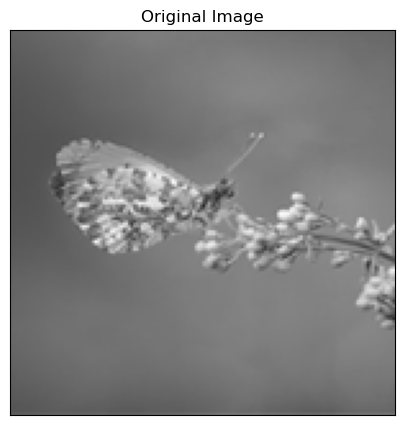

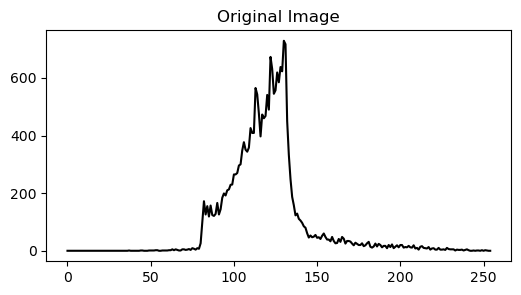

In [74]:
img = cv2.imread('img1.tif', cv2.IMREAD_GRAYSCALE)
imshow("Original Image", img)
Histogram("Original Image", img, size= 3, grayImgEn= True)

Our functions are in (0, 1) range, so I rescale the img in (0, 1) from (0, 255). then it can be easier and of cousre is correct for the last two function.

At the end of each task, we have to scale back the image.

In [75]:
img = img / 255

<center>

1. The first function is revese the color.

<img src="func1.png" width="200" height="200">

𝒇(x) = 255 - x

---
2. The second one filter specific colors in image and shown them in black.

<img src="func2.png" width="200" height="200">

𝒇(x) = x: 0 <x< 0.2 | 0: 0.2 <x< 0.55  | x: 0.55 <x< 1

---
3. The third one just reveal specific colors and out of that saturation range it round it on white or black.

<img src="func3.png" width="200" height="200">

𝒇(x) = 0: 0 <x< 0.4 | x: 0.4 <x< 0.55 | 1: 0.55 <x< 1

---
4. The fourth one plus fix specific color range to one color, it strechs the other parts.

<img src="func4.png" width="200" height="200">

𝒇(x) = 1.5x: 0 <x< 0.2 | 0.3: 0.2 <x< 0.55 | 14/9x-5/9: 0.55 <x< 1

---
5. The fifth function strech the image with root function, in this section we have to convert our image into (0, 1) scale, otherwise we get the wrong result.

<img src="func5.png" width="200" height="200">

𝒇(x) = ✔x 

---
6. The last one is like previous function with square function.

<img src="func6.png" width="200" height="200">

𝒇(x) = x: x^2
<center>


The functionality of ours transfers function is better shown at those histograms.

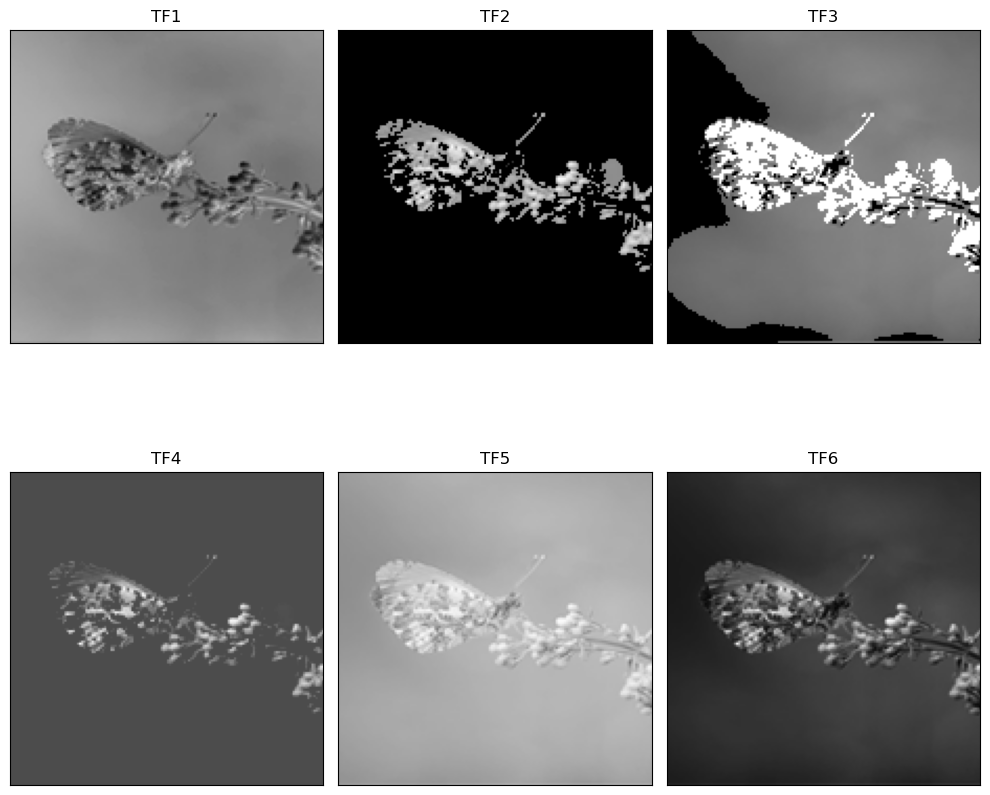

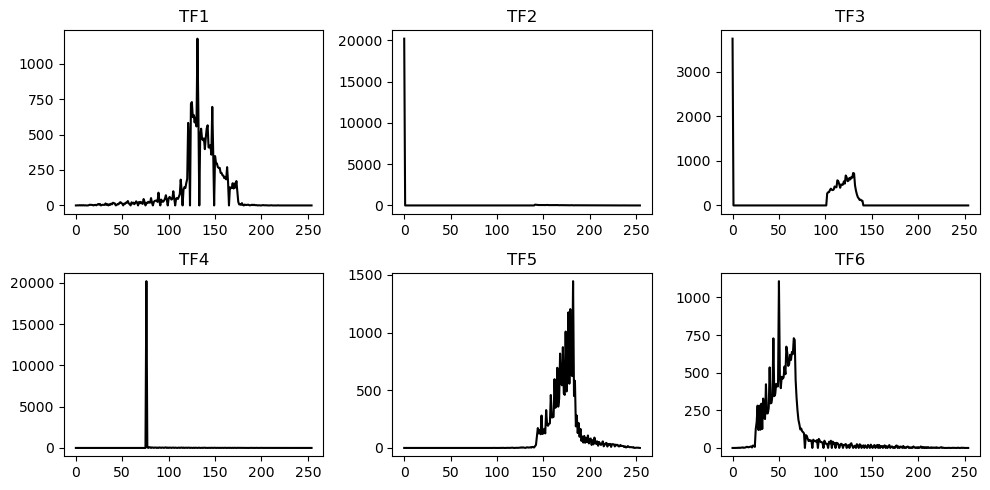

In [76]:
# TF1
grayImg1 = img.copy()
grayImg1 = 1 - grayImg1
grayImg1 *= 255
grayImg1 = grayImg1.astype('uint8')

# TF2
grayImg2 = img.copy()
grayImg2[(0.2 < grayImg2) & (grayImg2 < 0.55)] = 0
grayImg2 *= 255
grayImg2 = grayImg2.astype('uint8')

# TF3
grayImg3 = img.copy()
grayImg3[grayImg3 < 0.4] = 0
grayImg3[grayImg3 > 0.55] = 1
grayImg3 *= 255
grayImg3 = grayImg3.astype('uint8')

# TF4
grayImg4 = img.copy()
grayImg4[grayImg4 <= 0.2] = 1.5*grayImg4[grayImg4 <= 0.2]
grayImg4[(grayImg4 > 0.2) & (grayImg4 < 0.55)] = 0.3
grayImg4[grayImg4 >= 0.55] = 14/9*grayImg4[grayImg4 >= 0.55] - 5/9
grayImg4 *= 255
grayImg4 = grayImg4.astype('uint8')

# TF5
grayImg5 = img.copy()
grayImg5 = np.power(grayImg5, 1/2)
grayImg5 *= 255
grayImg5 = grayImg5.astype('uint8')

# TF6
grayImg6 = img.copy()
grayImg6 = np.power(grayImg6, 2)
grayImg6 *= 255
grayImg6 = grayImg6.astype('uint8')

image = [grayImg1, grayImg2, grayImg3, grayImg4, grayImg5, grayImg6]
title = ["TF1", "TF2", "TF3", "TF4", "TF5" , "TF6"]
imshow(title, image, size= 10, subplot= [2, 3])
Histogram(title, image, subplot= [2, 3], grayImgEn= True)

## Question 2

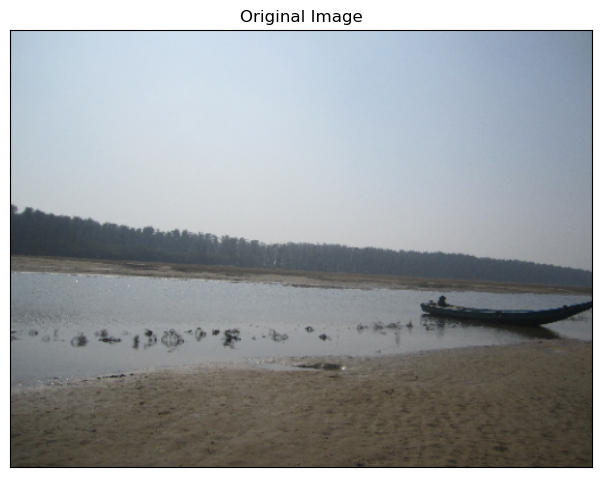

In [93]:
img = cv2.imread('img2.png')
imshow("Original Image", image= img, size= 10)

⚫ Seperate RGB channels 

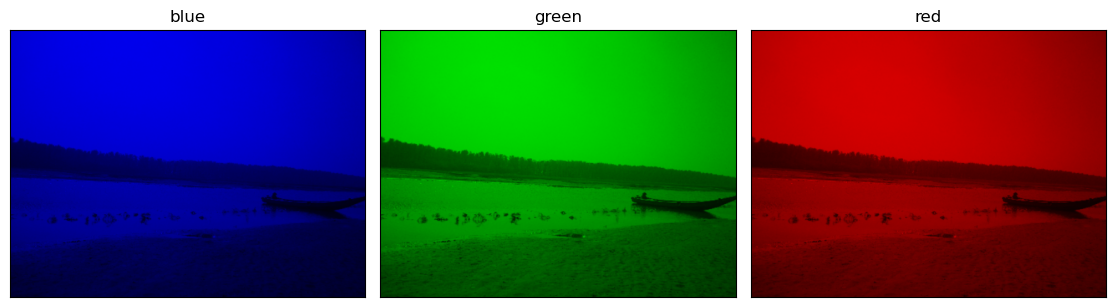

In [94]:
B, G, R = cv2.split(img)
zeros = np.zeros(img.shape[:2], dtype= "uint8")

image = [cv2.merge([B, zeros, zeros]), cv2.merge([zeros, G, zeros]), cv2.merge([zeros, zeros, R])]
title = ["blue", "green", "red"]
imshow(title, image, size= 15, subplot= [1, 3])

⚫ Show the histogram of Original Image

As we can see in the histogram the color is'nt change smoothly.

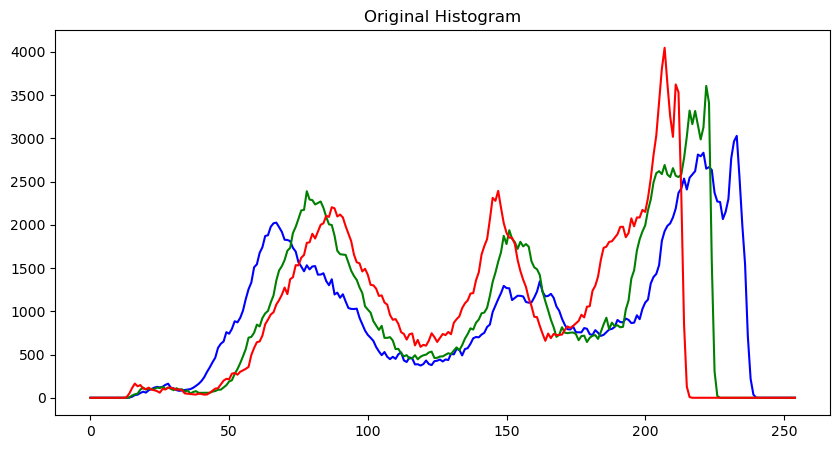

In [95]:
Histogram("Original Histogram", img)

Now with Linear Interpolation and changing it's scale size, we can found the differences.

However this image doesn't change so obvious, but you can check the differences of it's histogram. 

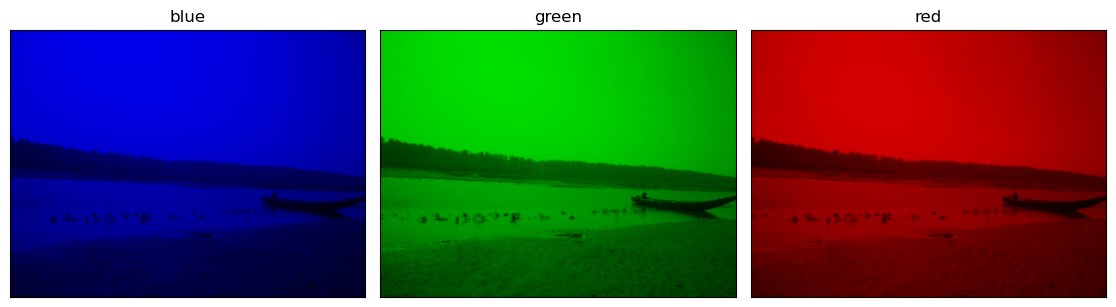

In [96]:
scaleSize = 10
B_LI = cv2.resize(B, None, fx= scaleSize, fy= scaleSize, interpolation= cv2.INTER_LINEAR)
G_LI = cv2.resize(G, None, fx= scaleSize, fy= scaleSize, interpolation= cv2.INTER_LINEAR)
R_LI = cv2.resize(R, None, fx= scaleSize, fy= scaleSize, interpolation= cv2.INTER_LINEAR)

zeros = np.zeros(np.multiply(img.shape[:2], scaleSize), dtype = "uint8")

image = [cv2.merge([B_LI, zeros, zeros]), cv2.merge([zeros, G_LI, zeros]), cv2.merge([zeros, zeros, R_LI])]
title = ["blue", "green", "red"]
imshow(title, image, size= 15, subplot= [1, 3])

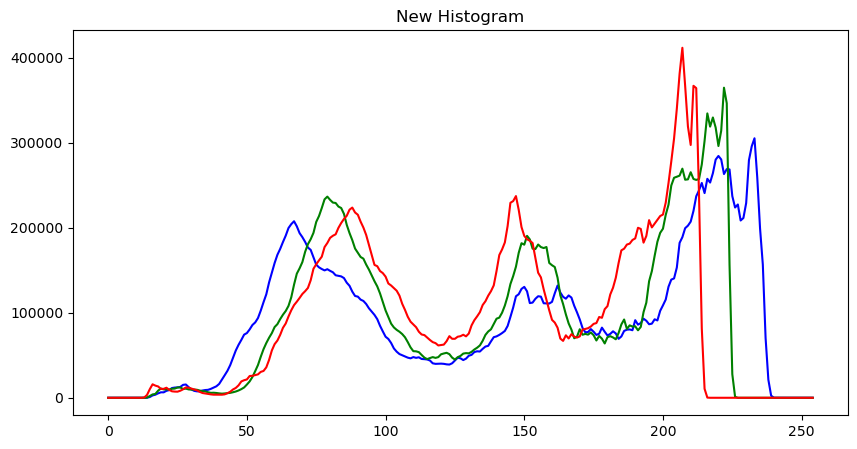

In [97]:
imgNew = cv2.merge([B_LI, G_LI, R_LI])

Histogram("New Histogram", imgNew) 

As it is obvious the colors histogram got smoother. And by upgrade the scalesize we can see the differences more.

But for have the better conclusion I change the scale size to 0.2, so the image got worse.

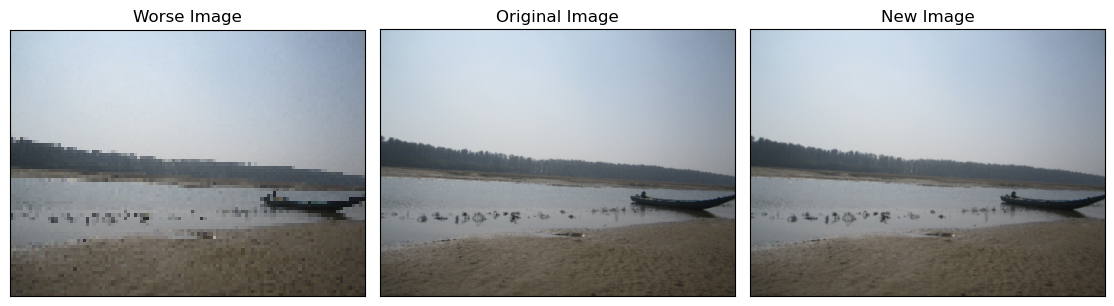

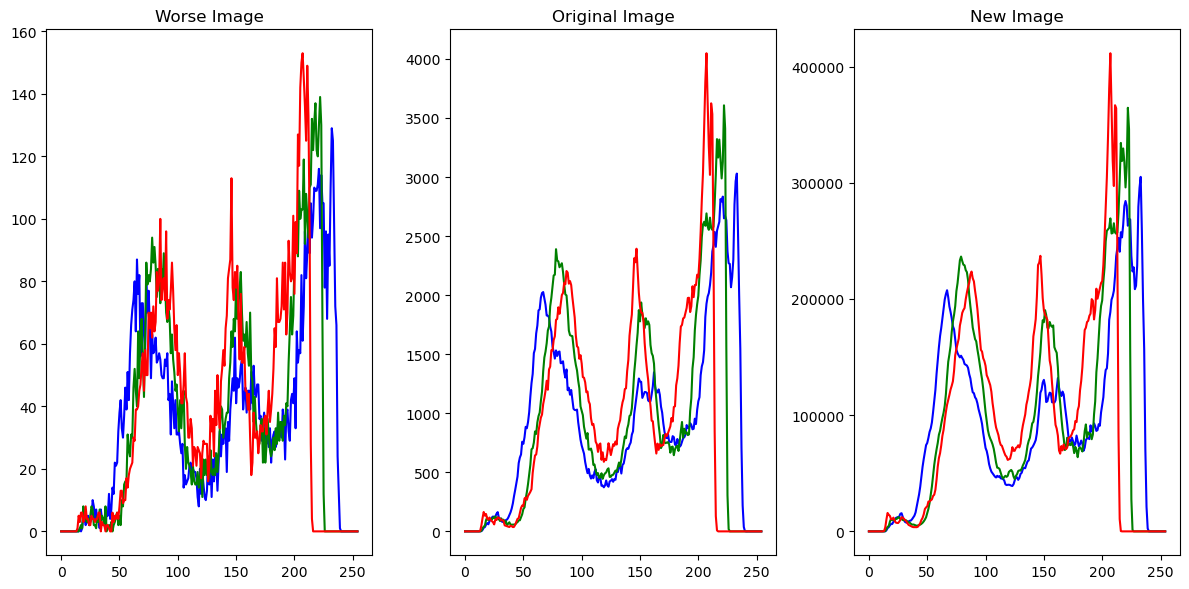

In [100]:
scaleSize = 0.2
B_W = cv2.resize(B, None, fx= scaleSize, fy= scaleSize, interpolation= cv2.INTER_LINEAR)
G_W = cv2.resize(G, None, fx= scaleSize, fy= scaleSize, interpolation= cv2.INTER_LINEAR)
R_W = cv2.resize(R, None, fx= scaleSize, fy= scaleSize, interpolation= cv2.INTER_LINEAR)
imgWorse = cv2.merge([B_W, G_W, R_W])

imshow(["Worse Image","Original Image", "New Image"], [imgWorse, img ,imgNew], size= 15, subplot= [1, 3])
Histogram(["Worse Image","Original Image", "New Image"], [imgWorse, img ,imgNew], size= 6, subplot= [1, 3])

So if we upgrade the scaleSize, the accuracy of changing color being more; I mean that the picture delet some noise like the little wave on lake, or sand shadows.

## Question 3

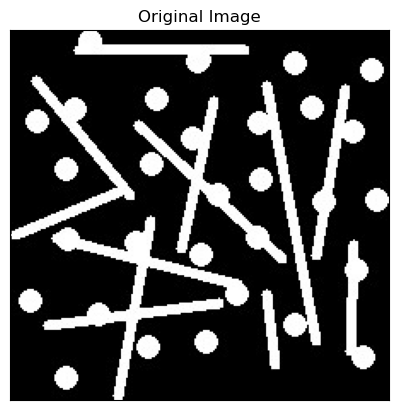

(217, 222)

In [83]:
img = cv2.imread("img3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow("Original Image", img)
img.shape

In this part for detect the circles I use 3 kernels, Horizontal, Vertical and Circle.

First of all, I try to remove horizontal lines so I use erode function and then do the same thing for verticals. In this operation remove some part of oblique lines, too.

Then as I shown in the step 2 there where the point of center circles, so in this section I use circle kernel and dilate these points to shown the circles.

In [84]:
cir_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13, 13))
hor_kernel = np.ones([1, 10], dtype= 'uint8')
ver_kernel = np.ones([10, 1], dtype= 'uint8')

imgLineDel_1 = cv2.erode(img, ver_kernel, iterations= 1)
imgLineDel_2 = cv2.erode(imgLineDel_1, hor_kernel, iterations= 1)
imgLineDel_3 = cv2.dilate(imgLineDel_2, cir_kernel, iterations= 1)

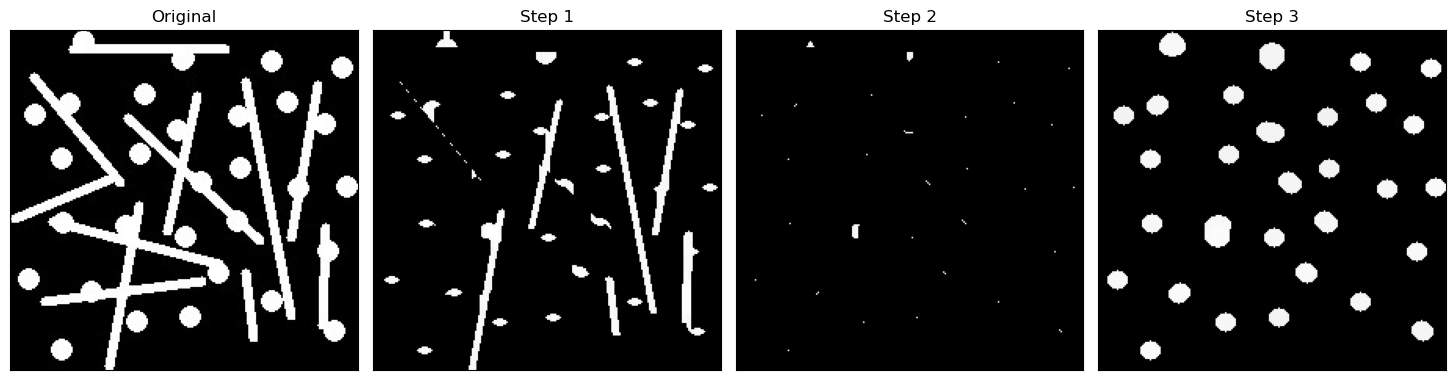

In [85]:
image = [img, imgLineDel_1, imgLineDel_2, imgLineDel_3]
title = ["Original", "Step 1", "Step 2", "Step 3"]
imshow(title, image, size= 15, subplot= [1, 4])

For Line detection, knowing that by using OPEN morphology structure, we can extract the shape of our kernel from the image.

But there is a problem, open-cv only support vertical & horizontal line kernels. So for detect the oblique lines, I rotate the original image and apply the horizontal kernel.

Smaller degree size, more accuracy we have, on the other hand our resources usage got bigger. Therefore, there is a tradeoff between accuracy & resources usage.

In this section I rotate image 10 degrees.

I wrote a rotate function below, it's more simple to use.

In [86]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape
    if center is None:
        center = (w/2, h/2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

I choose 1*46 kernel for have the lines clear.

Afterall, I **OR** all the extracions parts in result image as shown below and use the square kernel with small dimention for removing extra niose.

In [87]:
lineKernel = np.ones([1, 46], dtype= 'uint8')
squareKernel = np.ones([3, 3], dtype= 'uint8')

lineDet_0 = cv2.morphologyEx(img, cv2.MORPH_OPEN, lineKernel)
lineDet_10 = rotate(cv2.morphologyEx(rotate(img, 10), cv2.MORPH_OPEN, lineKernel), -10)
lineDet_20 = rotate(cv2.morphologyEx(rotate(img, 20), cv2.MORPH_OPEN, lineKernel), -20)
lineDet_30 = rotate(cv2.morphologyEx(rotate(img, 30), cv2.MORPH_OPEN, lineKernel), -30)
lineDet_40 = rotate(cv2.morphologyEx(rotate(img, 40), cv2.MORPH_OPEN, lineKernel), -40)
lineDet_50 = rotate(cv2.morphologyEx(rotate(img, 50), cv2.MORPH_OPEN, lineKernel), -50)
lineDet_60 = rotate(cv2.morphologyEx(rotate(img, 60), cv2.MORPH_OPEN, lineKernel), -60)
lineDet_70 = rotate(cv2.morphologyEx(rotate(img, 70), cv2.MORPH_OPEN, lineKernel), -70)
lineDet_80 = rotate(cv2.morphologyEx(rotate(img, 80), cv2.MORPH_OPEN, lineKernel), -80)
lineDet_90 = rotate(cv2.morphologyEx(rotate(img, 90), cv2.MORPH_OPEN, lineKernel), -90)
lineDet_100 = rotate(cv2.morphologyEx(rotate(img, 100), cv2.MORPH_OPEN, lineKernel), -100)
lineDet_110 = rotate(cv2.morphologyEx(rotate(img, 110), cv2.MORPH_OPEN, lineKernel), -110)
lineDet_120 = rotate(cv2.morphologyEx(rotate(img, 120), cv2.MORPH_OPEN, lineKernel), -120)
lineDet_130 = rotate(cv2.morphologyEx(rotate(img, 130), cv2.MORPH_OPEN, lineKernel), -130)
lineDet_140 = rotate(cv2.morphologyEx(rotate(img, 140), cv2.MORPH_OPEN, lineKernel), -140)
lineDet_150 = rotate(cv2.morphologyEx(rotate(img, 150), cv2.MORPH_OPEN, lineKernel), -150)
lineDet_160 = rotate(cv2.morphologyEx(rotate(img, 160), cv2.MORPH_OPEN, lineKernel), -160)
lineDet_170 = rotate(cv2.morphologyEx(rotate(img, 170), cv2.MORPH_OPEN, lineKernel), -170)


lineDetectResult = lineDet_0 | lineDet_10 | lineDet_20 | lineDet_30 | lineDet_40 | lineDet_50 | lineDet_60 | lineDet_70 | lineDet_80 | lineDet_90 | lineDet_100 | lineDet_110 | lineDet_120 | lineDet_130 | lineDet_140 | lineDet_150 | lineDet_160 | lineDet_170
lineDetectResult = cv2.morphologyEx(lineDetectResult, cv2.MORPH_OPEN, squareKernel)

By using ssubplots, I show every steps in a row.

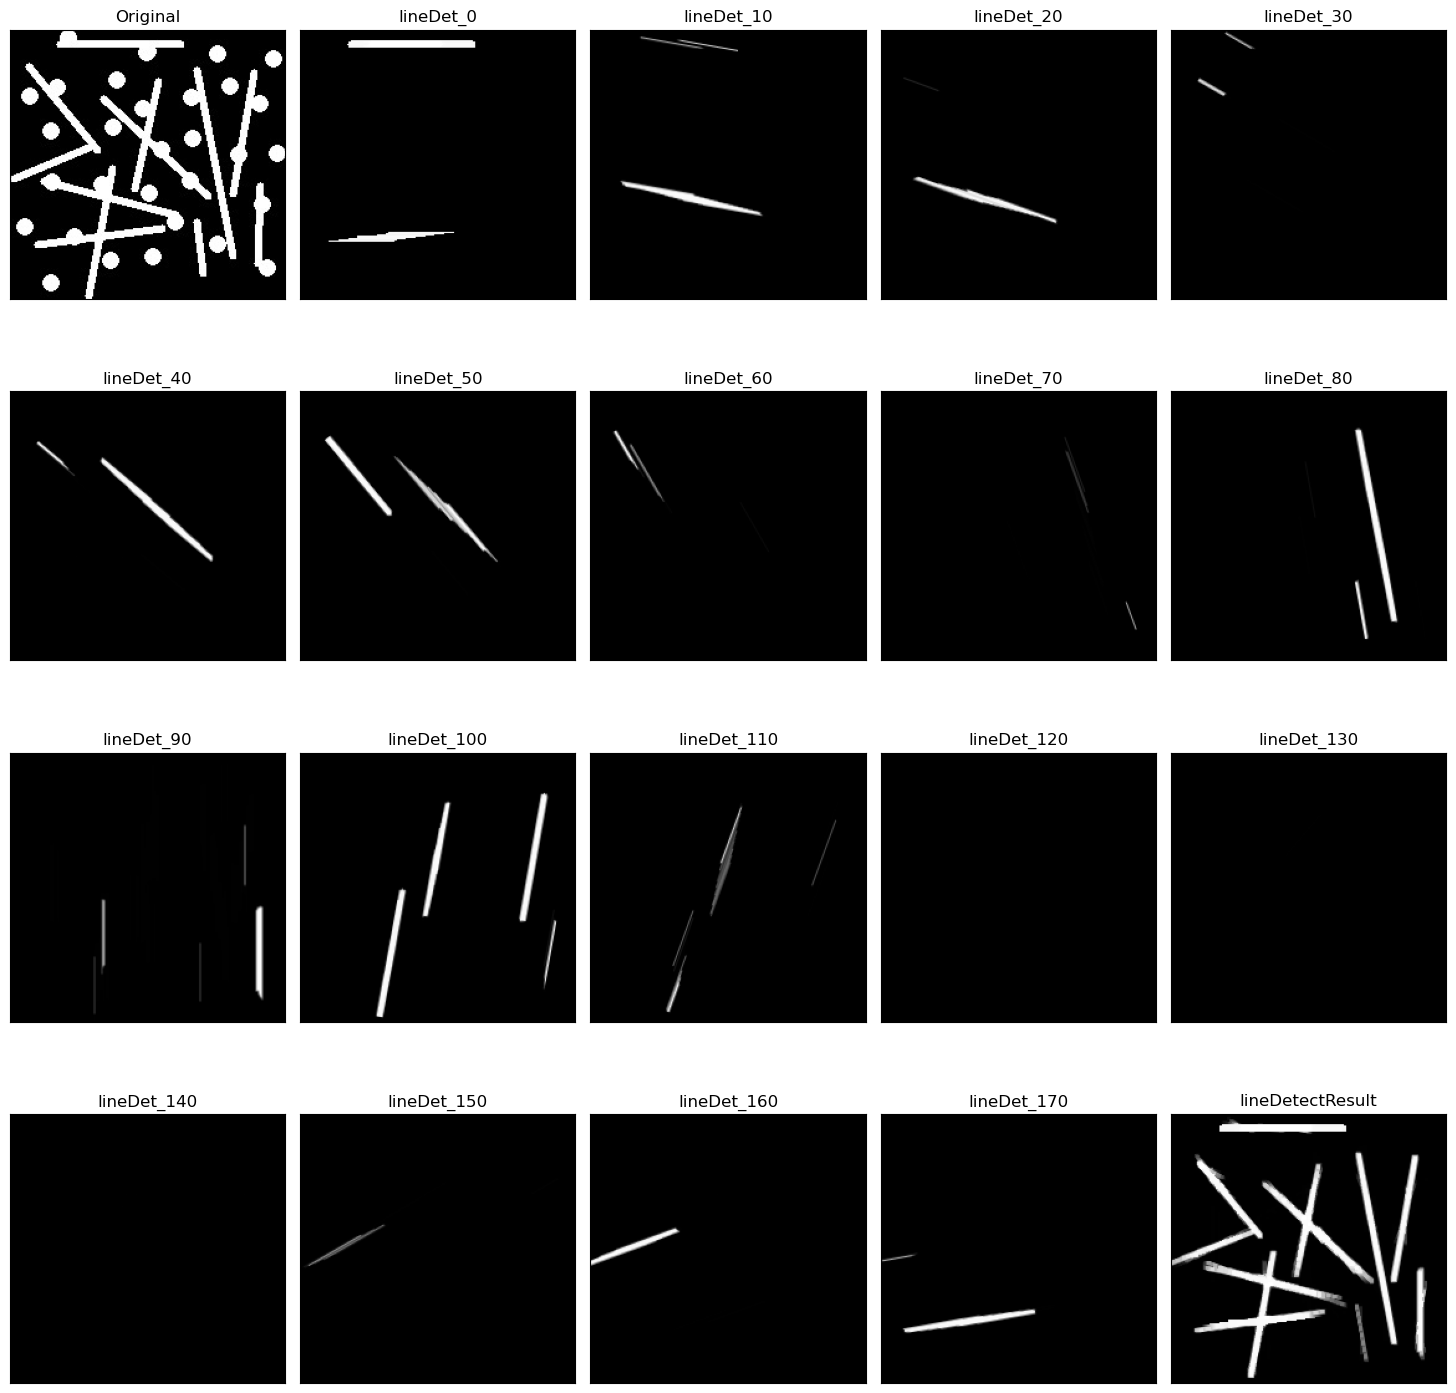

In [88]:
image = [img, lineDet_0, lineDet_10, lineDet_20, lineDet_30, lineDet_40, lineDet_50, lineDet_60, lineDet_70, lineDet_80, lineDet_90, lineDet_100, lineDet_110, lineDet_120, lineDet_130, lineDet_140, lineDet_150, lineDet_160, lineDet_170, lineDetectResult]
title = ["Original", "lineDet_0", "lineDet_10", "lineDet_20", "lineDet_30", "lineDet_40", "lineDet_50", "lineDet_60", "lineDet_70", "lineDet_80", "lineDet_90", "lineDet_100", "lineDet_110", "lineDet_120", "lineDet_130", "lineDet_140", "lineDet_150", "lineDet_160", "lineDet_170", "lineDetectResult"]
imshow(title, image, size= 15, subplot= [4, 5])

## Question 4

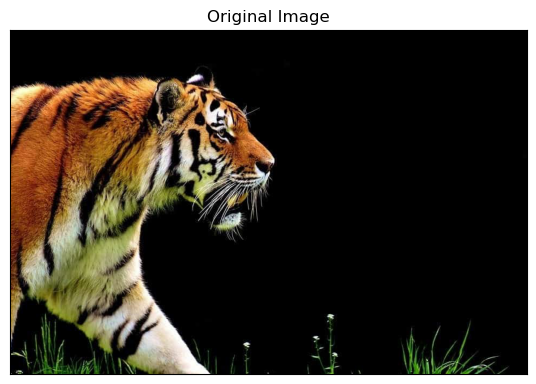

In [89]:
img = cv2.imread("img4.jpg")
imshow("Original Image", img, size= 10)

First of all, we have to convert color to Gray Scale, In this case we can apply the filters.

I choose the kernels size of 5, then by doing sobel and canny edge detection we can see the result.

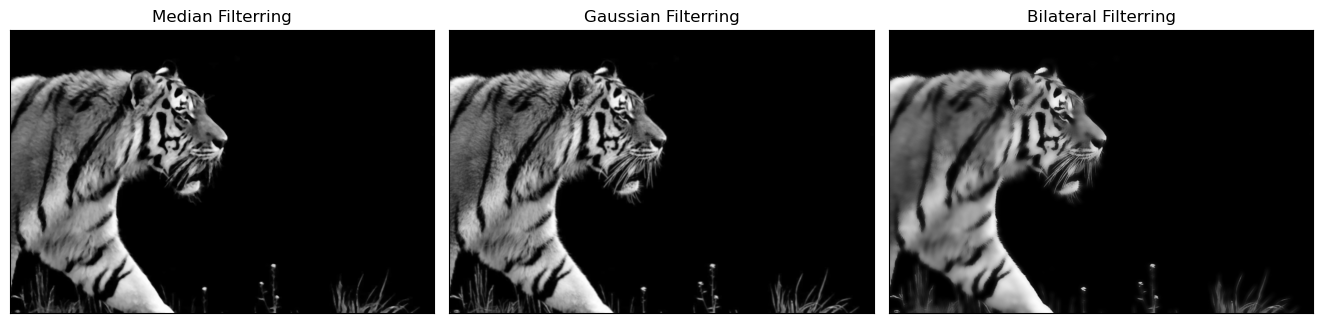

In [90]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
medianImg = cv2.medianBlur(img, 5)
gaussianImg = cv2.GaussianBlur(img, (5, 5), 0)
bilateralImg = cv2.bilateralFilter(img, 15, 75, 75)

image = [medianImg, gaussianImg, bilateralImg]
title = ["Median Filterring", "Gaussian Filterring", "Bilateral Filterring"]
imshow(title, image, size= 20, subplot= [1, 3])

As you can see, each columns is for specific filtering.

In the first I make a 3*3 matrix of image to show the outputs perfectly.

for the sobel part, as we can see the difference between x & y edge is'nt so obvious, therefore there is not much difference between Gaussian and Median, either. however we have smoother edge in bilateral filtering.

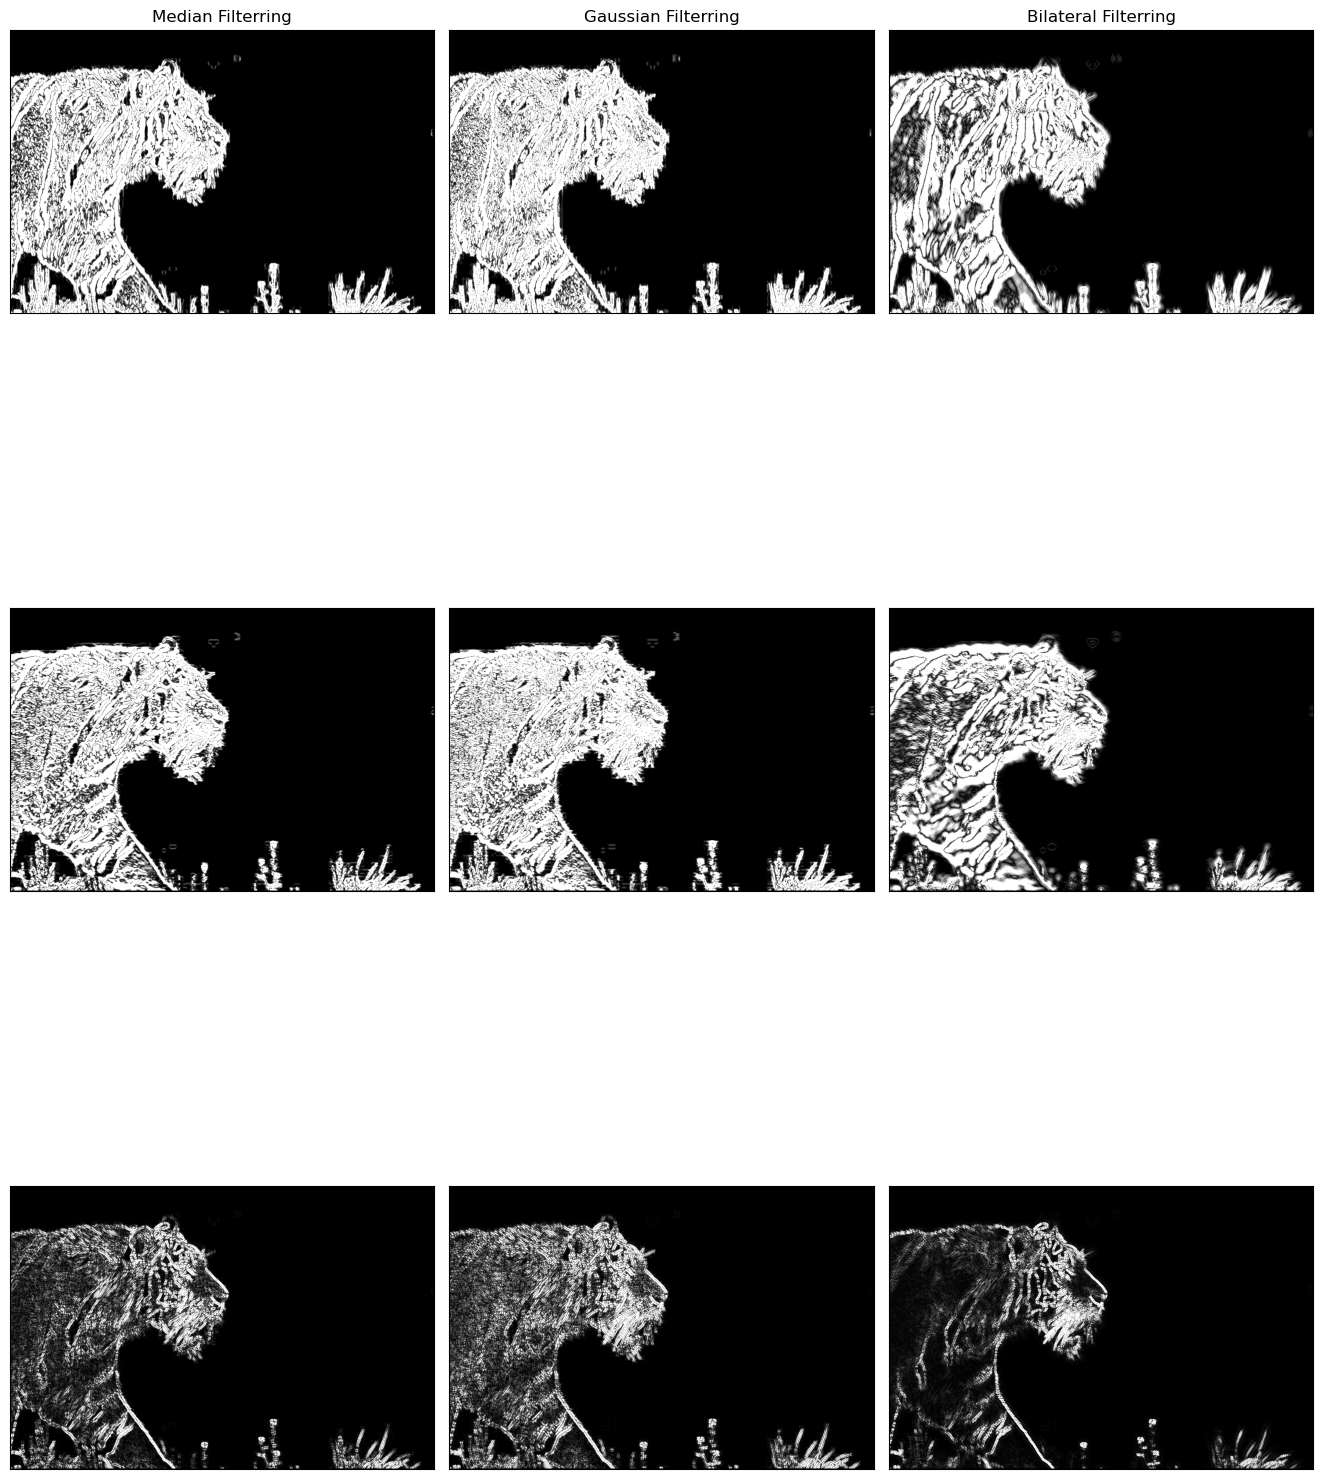

In [91]:
image_r = [None] * 9
for i, img in enumerate(image):
  sobelx = cv2.Sobel(src= img, ddepth= cv2.CV_64F, dx= 1, dy= 0, ksize= 5)
  sobely = cv2.Sobel(src= img, ddepth= cv2.CV_64F, dx= 0, dy= 1, ksize= 5)
  sobelxy = cv2.Sobel(src= img, ddepth= cv2.CV_64F, dx= 1, dy= 1, ksize= 5) 
  image_r[i] = cv2.convertScaleAbs(sobelx)
  image_r[i+3] = cv2.convertScaleAbs(sobely)
  image_r[i+6] = cv2.convertScaleAbs(sobelxy)

title = ["Median Filterring", "Gaussian Filterring", "Bilateral Filterring", "", "", "", "", "", ""]

imshow(title, image_r, size= 20, subplot= [3, 3])

We have the same result in canny alghorythm, too. As it is shown below the bilateral filtering found the edge more natural than the others.

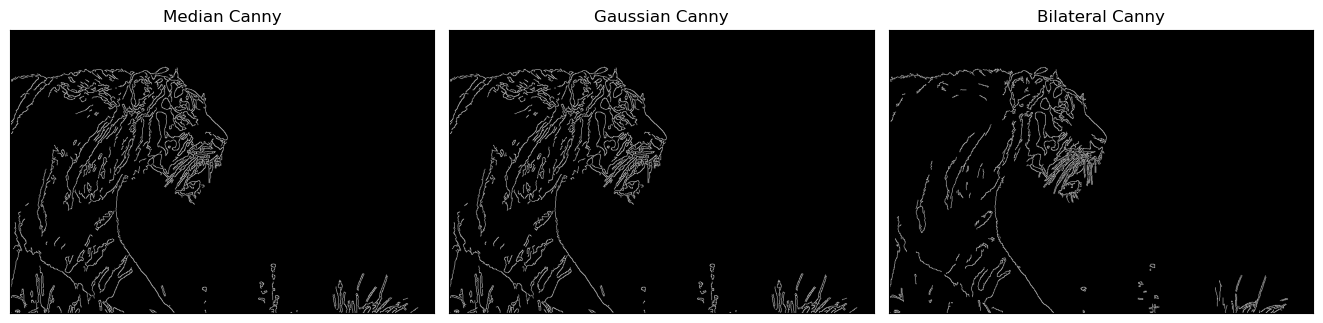

In [92]:
median_canny = cv2.Canny(image= medianImg, threshold1= 100, threshold2= 200) 
gaussian_canny = cv2.Canny(image= medianImg, threshold1= 100, threshold2= 200) 
bilateral_canny = cv2.Canny(image= bilateralImg, threshold1= 100, threshold2= 200) 

image = [median_canny, gaussian_canny, bilateral_canny]
title = ["Median Canny", "Gaussian Canny", "Bilateral Canny"]

imshow(title, image, size= 20, subplot= [1, 3])

* Median filtering: In median filtering recalculate the value of the center pixel by simply taking the median of all of the values inside the matrix inwhich here is 5*5 I mean replace each pixel with the median of its neighboring pixels.

* Gausian filtering: It performs a weighted average of surrounding pixels based on the Gaussian distribution. It is used to remove Gaussian noise and is a realistic model of defocused lens. Sigma defines the amount of blurring. Gaussian filtering is done by convolving each point in the input array with a Gaussian kernel and then summing them all to produce the output array.
  * For exaample in 1-D Gaussian kernel it's look like:
  
    <img src="Gaussian_Filter.png" width="200" height="200">


  * And for 2-D Gaussian kernel it's look like:
  
    <img src="2d_distribution.gif" width="200" height="200">

* Bilateral filtering: A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. Somehow its like Gausian filter. It is a good choice for removing the noise of pictures.
  * For example: 

    <img src="bilateral-filter.png" width="400" height="300">